In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
irisFile = open("Iris.csv","r")
df = pd.read_csv(irisFile)
species = sorted(list(set(df["Species"])))
print(species)


['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


In [3]:
df["Species"] = df["Species"].apply(lambda s : species.index(s))

In [4]:
x, y = df.iloc[:,1:-1], df.iloc[:,-1]

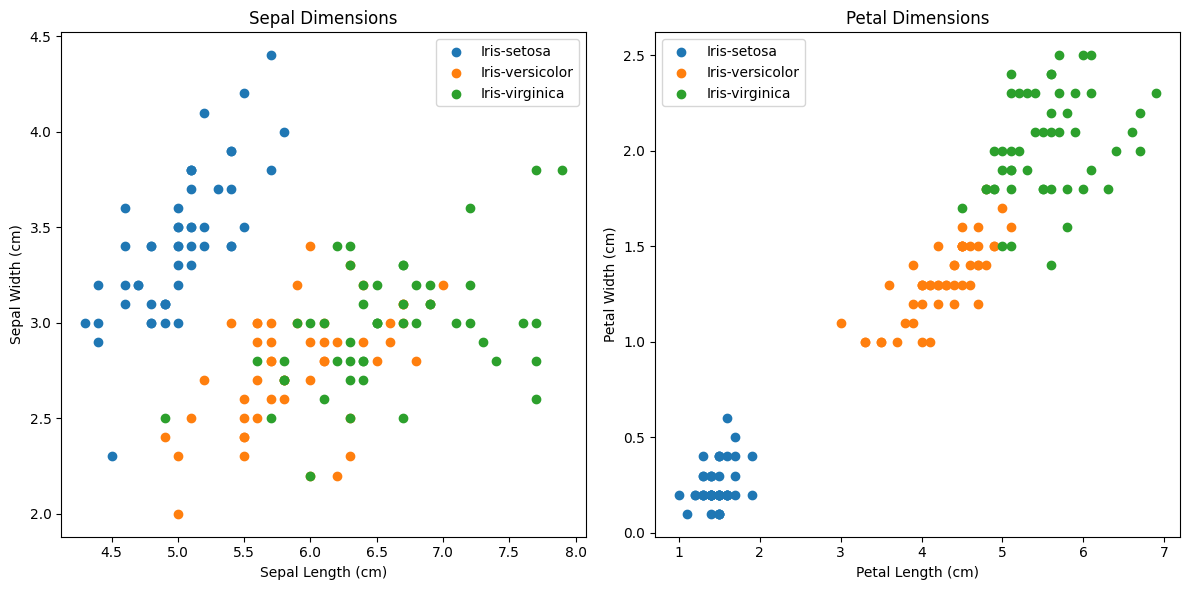

In [5]:
# Plotting Sepal dimensions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
for species_id, species_name in enumerate(species):
  subset = df[df['Species'] == species_id]
  plt.scatter(subset['SepalLengthCm'], subset['SepalWidthCm'], label=species_name)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Dimensions')
plt.legend()

# Plotting Petal dimensions
plt.subplot(1, 2, 2)
for species_id, species_name in enumerate(species):
  subset = df[df['Species'] == species_id]
  plt.scatter(subset['PetalLengthCm'], subset['PetalWidthCm'], label=species_name)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Dimensions')
plt.legend()

plt.tight_layout()
plt.show()

In [6]:
baseDf = df[df["Species"] != 0]
extraDf = df[df["Species"] == 0]

baseX, baseY = baseDf.iloc[:,1:-1], baseDf.iloc[:,-1]
extraX, extraY = extraDf.iloc[:,1:-1], extraDf.iloc[:,-1]

In [7]:
baseDf

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,1
51,52,6.4,3.2,4.5,1.5,1
52,53,6.9,3.1,4.9,1.5,1
53,54,5.5,2.3,4.0,1.3,1
54,55,6.5,2.8,4.6,1.5,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [8]:
extraDf

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
5,6,5.4,3.9,1.7,0.4,0
6,7,4.6,3.4,1.4,0.3,0
7,8,5.0,3.4,1.5,0.2,0
8,9,4.4,2.9,1.4,0.2,0
9,10,4.9,3.1,1.5,0.1,0


In [9]:
baseXTrain, baseXTest, baseYTrain, baseYTest = train_test_split(baseX, baseY, train_size=0.8)
extraXTrain, extraXTest, extraYTrain, extraYTest = train_test_split(extraX, extraY, train_size=0.8)
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.8)


In [10]:
baseXTensorTrain = torch.tensor(np.array(baseXTrain.values), dtype=torch.float32)
baseYTensorTrain = torch.tensor(np.array(baseYTrain.values), dtype=torch.long)

baseXTensorTest = torch.tensor(np.array(baseXTest.values), dtype=torch.float32)
baseYTensorTest = torch.tensor(np.array(baseYTest.values), dtype=torch.long)

extraXTensorTrain = torch.tensor(np.array(extraXTrain.values), dtype=torch.float32)
extraYTensorTrain = torch.tensor(np.array(extraYTrain.values), dtype=torch.long)

extraXTensorTest = torch.tensor(np.array(extraXTest.values), dtype=torch.float32)
extraYTensorTest = torch.tensor(np.array(extraYTest.values), dtype=torch.long)

xTensorTrain = torch.tensor(np.array(xTrain.values), dtype=torch.float32)
yTensorTrain = torch.tensor(np.array(yTrain.values), dtype=torch.long)

xTensorTest = torch.tensor(np.array(xTest.values), dtype=torch.float32)
yTensorTest = torch.tensor(np.array(yTest.values), dtype=torch.long)


In [11]:
def inference(model, xTensor, yTensor):
  yPred = model(xTensor)
  yPred = torch.argmax(yPred,dim = 1)
  for x,y in zip(yPred,yTensor):
    print(int(x),int(y),sep="|")
  print("Confusion Matrix:\n", confusion_matrix(yTensor,yPred.cpu()))
  print("Accuracy:", accuracy_score(yPred.cpu(), yTensor))

In [12]:
class FullyConnected(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(4, 64)  # Input layer to 64 neurons
        self.act1 = nn.ReLU()       # ReLU activation function
        self.l2 = nn.Linear(64, 16) # 64 neurons to 16 neurons
        self.drop = nn.Dropout(0.2) # Dropout for regularization
        self.act2 = nn.ReLU()       # Another ReLU
        self.l3 = nn.Linear(16, 3)  # Output layer to 3 neurons (classes)

    def forward(self, x):
        # Forward pass
        x = self.l1(x)
        x = self.act1(x)
        x = self.l2(x)
        x = self.drop(x)
        x = self.act2(x)
        x = self.l3(x)
        return x

In [13]:
def fit(model,xTensor,yTensor):
    epochs = 400
    loss_arr = []
    loss_fn = nn.CrossEntropyLoss()
    optim = torch.optim.Adam(model.parameters(), lr=0.002)

    for epoch in range(epochs):
        ypred = model(xTensor)
        loss = loss_fn(ypred, yTensor)
        loss_arr.append(loss.item())
        loss.backward()
        optim.step()
        optim.zero_grad()
    plt.plot(loss_arr)
    plt.show()

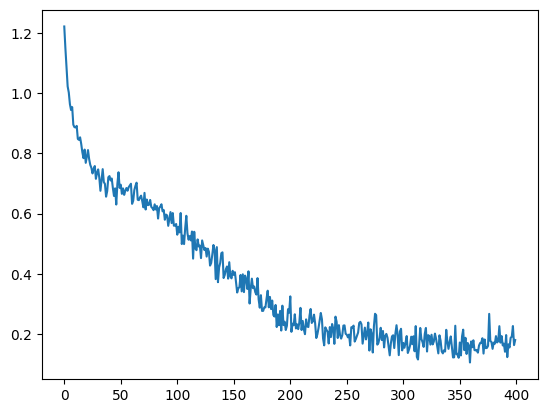

In [14]:
model = FullyConnected()
fit(model,baseXTensorTrain,baseYTensorTrain)

In [15]:
inference(model,baseXTensorTest,baseYTensorTest)

1|1
1|1
1|1
2|2
1|1
1|1
1|1
2|2
2|2
2|2
1|1
2|2
2|2
2|1
2|2
2|2
2|2
1|1
1|1
1|1
Confusion Matrix:
 [[10  1]
 [ 0  9]]
Accuracy: 0.95


In [16]:
torch.save(model,"model.pt")

# Naive approach

In [17]:
newModel = FullyConnected()
newModel = torch.load("model",weights_only=False)

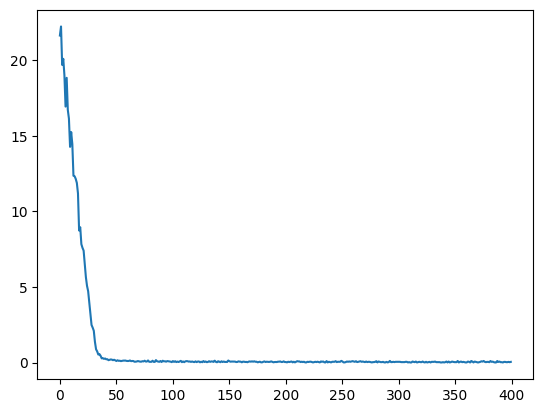

In [18]:
fit(newModel,extraXTensorTrain, extraYTensorTrain)

In [19]:
inference(newModel,xTensorTest,yTensorTest)

2|1
2|1
2|2
0|0
0|1
2|1
2|2
2|2
2|1
0|0
2|2
0|0
2|1
2|1
0|1
2|2
0|1
0|1
0|0
0|0
2|1
2|2
2|2
0|0
2|2
2|2
2|1
2|1
0|1
0|0
Confusion Matrix:
 [[7 0 0]
 [5 0 9]
 [0 0 9]]
Accuracy: 0.5333333333333333


# Distillation loss

In [20]:
distillationModel = torch.load("model.pt")
model.eval()

FullyConnected(
  (l1): Linear(in_features=4, out_features=64, bias=True)
  (act1): ReLU()
  (l2): Linear(in_features=64, out_features=16, bias=True)
  (drop): Dropout(p=0.2, inplace=False)
  (act2): ReLU()
  (l3): Linear(in_features=16, out_features=3, bias=True)
)

In [21]:
def distillationFit(oldModel, newModel, xTensor, yTensor, lambdaValue):
  ceLoss = nn.CrossEntropyLoss()
  klLoss = nn.KLDivLoss(reduction="batchmean")
  optim = torch.optim.Adam(newModel.parameters(), lr=1e-4)
  epochs = 400
  for _ in range(epochs):
    newPred = newModel(xTensor)
    with torch.no_grad():
      oldPred = oldModel(xTensor)
      distillationLoss = klLoss(
        torch.log_softmax(newPred,dim=1),
        torch.softmax(oldPred,dim=1)
      )

    ceLossValue = ceLoss(newPred,yTensor)

    loss = distillationLoss * lambdaValue + ceLossValue * (1-lambdaValue)
      
    optim.zero_grad()
    loss.backward()
    optim.step()
        

In [22]:
distillationFit(model,distillationModel,extraXTensorTrain,extraYTensorTrain,10)

In [23]:
inference(distillationModel,xTensorTest,yTensorTest)

1|1
1|1
1|2
1|0
1|1
1|1
2|2
2|2
1|1
1|0
1|2
1|0
1|1
1|1
1|1
2|2
1|1
1|1
1|0
1|0
1|1
1|2
1|2
1|0
1|2
1|2
1|1
1|1
1|1
1|0
Confusion Matrix:
 [[ 0  7  0]
 [ 0 14  0]
 [ 0  6  3]]
Accuracy: 0.5666666666666667


# EWC

In [24]:
def computeFisherMatrix(model, xTensor, yTensor):
  fisherMatrix = {name:torch.zeros_like(param) for name, param, in model.named_parameters()}
  model.eval()

  model.zero_grad()
  preds = model(xTensor)
  loss = nn.CrossEntropyLoss()(preds, yTensor)
  loss.backward()

  for name, param in model.named_parameters():
    fisherMatrix[name] += param.grad ** 2

  for name in fisherMatrix:
    fisherMatrix[name] /= len(xTensor)
  
  return fisherMatrix

In [25]:
def ewcLoss(model, fisherMatrix, oldWeight, lambdaValue):
  ewcTerm = 0
  for name, param in model.named_parameters():
        ewcTerm += (fisherMatrix[name] * (param - oldWeight[name]) ** 2).sum()
  return ewcTerm * lambdaValue

In [26]:
def psuedoOldData(model, x, y):
    model.eval()
    new_x = torch.randn_like(x)
    with torch.no_grad():
        logits = model(new_x)
        new_y = torch.argmax(logits, dim=1)
    return new_x, new_y

In [27]:
def ewcFit(oldModel, newModel, newXTensor, newYTensor, lambdaValue):
    optim = torch.optim.Adam(newModel.parameters(), lr=1e-2)
    oldWeight = {name: param.clone().detach()
                 for name, param in oldModel.named_parameters()}
    pseudoXTensor, pseudoYTensor = psuedoOldData(oldModel, newXTensor, newYTensor)
    fisherMatrix = computeFisherMatrix(oldModel, pseudoXTensor, pseudoYTensor)
    epochs = 400

    for i in range(epochs):
        yPreds = newModel(newXTensor)
        ceLoss = nn.CrossEntropyLoss()(yPreds, newYTensor)
        loss = ceLoss + ewcLoss(newModel, fisherMatrix, oldWeight, lambdaValue)

        optim.zero_grad()
        loss.backward()
        optim.step()

In [28]:
model = torch.load("model.pt")
ewcModel = torch.load("model.pt")
ewcFit(model,ewcModel,extraXTensorTrain,extraYTensorTrain,10000)

In [29]:
inference(ewcModel,xTensorTest,yTensorTest)

0|1
0|1
0|2
0|0
0|1
0|1
0|2
0|2
0|1
0|0
0|2
0|0
0|1
0|1
0|1
0|2
0|1
0|1
0|0
0|0
0|1
0|2
2|2
0|0
0|2
0|2
0|1
0|1
0|1
0|0
Confusion Matrix:
 [[ 7  0  0]
 [14  0  0]
 [ 8  0  1]]
Accuracy: 0.26666666666666666


In [30]:
px,py = psuedoOldData(ewcModel,xTensorTest,yTensorTest)
print(py)

tensor([1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1,
        1, 0, 2, 1, 1, 2])
